In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import os 
import PIL
import tensorflow as tf
import glob
import pathlib

In [ ]:
dataset_url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir =tf.keras.utils.get_file(fname = 'flower_photos' , origin=dataset_url ,untar=True  )
data_file=pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


In [ ]:
data_file

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
sorted(list(data_file.glob("*"))) #names of folders 

[PosixPath('/root/.keras/datasets/flower_photos/LICENSE.txt'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion'),
 PosixPath('/root/.keras/datasets/flower_photos/roses'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips')]

In [ ]:
list(data_file.glob("*/*")) #all the photos

[PosixPath('/root/.keras/datasets/flower_photos/daisy/538920244_59899a78f8_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/3703643767_dee82cdef9_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/19280272025_57de24e940_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/302782756_d35cb3e468.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/517054467_d82d323c33_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/6323721068_3d3394af6d_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/25360380_1a881a5648.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/1299501272_59d9da5510_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/8709110478_60d12efcd4_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/11124324295_503f3a0804.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/8740807508_0587f5b7b7.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/1306119996_ab8ae14d72_

lw hena tal3 el text file (license) hykon fe moshkela fl training , you can check it by typing list(data_file.glob("*/*.txt"))

In [ ]:

list(data_file.glob("*/*.txt"))

[]

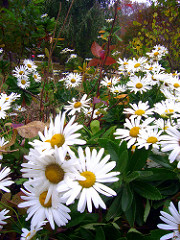

In [ ]:
PIL.Image.open('/root/.keras/datasets/flower_photos/daisy/5434742166_35773eba57_m.jpg')

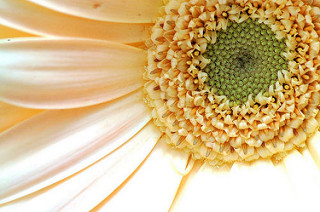

In [ ]:
PIL.Image.open(list(data_file.glob("*/*"))[179])

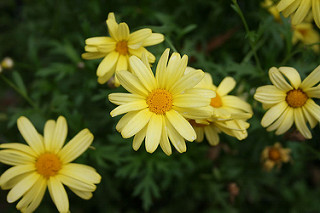

In [ ]:
PIL.Image.open (list(data_file.glob("*/*"))[34]) #another way if you aware with the image index

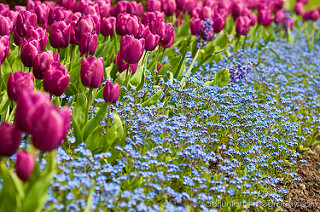

In [ ]:
PIL.Image.open('/root/.keras/datasets/flower_photos/tulips/6958243974_8851425ddb_n.jpg')

el dimentions bta3et l swar msh zay ba3d lazem el model ydkhol leh nfs el size

hwa keda 3ml upload ll images mn l link w 7atha 3ala el local drive bta3 el server w b3den hn2el l swar ll memory bta3et el gpu aw el lap 3shan wl model by train myfdalsh yro7 ll drive ygeeb el swar "swora b sowra"

In [ ]:
training_dataset =   tf.keras.utils.image_dataset_from_directory(data_file,image_size=(180,180),batch_size=32,validation_split=.2 , subset='training' , seed=2)
val_dataset =   tf.keras.utils.image_dataset_from_directory(data_file,image_size=(180,180),batch_size=32,validation_split=.2 , subset='validation',seed =3 )

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
Autotune =tf.data.AUTOTUNE 
training_dataset = training_dataset.cache().shuffle(1000).prefetch(buffer_size= Autotune)
val_dataset=val_dataset.cache().prefetch(buffer_size=Autotune)

ezay b3mel model ? 

In [ ]:
data_augmnation= tf.keras.Sequential([tf.keras.layers.RandomFlip('vertical', input_shape=(180,180,3)),tf.keras.layers.RandomRotation(.2), tf.keras.layers.RandomZoom(.3)])

In [ ]:
model = tf.keras.Sequential()

In [ ]:

model.add(tf.keras.layers.Rescaling(1/255,input_shape =(180, 180,3)))

In [ ]:
model.add(data_augmnation)

In [ ]:
model.add(tf.keras.layers.Conv2D(32,3,padding='same' , activation= 'relu', input_shape=(180,180,3) ))


In [ ]:
model.add(tf.keras.layers.MaxPool2D())

In [ ]:
model.add(tf.keras.layers.Conv2D(64,3, padding ='same' , activation = "relu" ))

In [ ]:
model.add(tf.keras.layers.MaxPool2D())

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras. layers.Dense(128,activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(5))

In [ ]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                  

In [ ]:
model.compile (optimizer='adam' ,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics='accuracy')

In [ ]:
history=model.fit(training_dataset , batch_size=32 , epochs =80 , validation_data=val_dataset )

Epoch 1/80
92/92 [==============================] - 22s 55ms/step - loss: 1.7120 - accuracy: 0.4244 - val_loss: 1.2069 - val_accuracy: 0.4837
Epoch 2/80
92/92 [==============================] - 4s 39ms/step - loss: 1.1470 - accuracy: 0.5129 - val_loss: 1.1229 - val_accuracy: 0.5422
Epoch 3/80
92/92 [==============================] - 4s 39ms/step - loss: 1.0819 - accuracy: 0.5657 - val_loss: 1.0262 - val_accuracy: 0.5967
Epoch 4/80
92/92 [==============================] - 4s 41ms/step - loss: 1.0196 - accuracy: 0.5971 - val_loss: 0.9733 - val_accuracy: 0.6308
Epoch 5/80
92/92 [==============================] - 4s 39ms/step - loss: 0.9597 - accuracy: 0.6107 - val_loss: 1.0186 - val_accuracy: 0.6008
Epoch 6/80
92/92 [==============================] - 4s 39ms/step - loss: 0.9229 - accuracy: 0.6277 - val_loss: 1.0361 - val_accuracy: 0.6308
Epoch 7/80
92/92 [==============================] - 4s 39ms/step - loss: 0.9146 - accuracy: 0.6356 - val_loss: 0.9107 - val_accuracy: 0.6512
Epoch 8/80
9

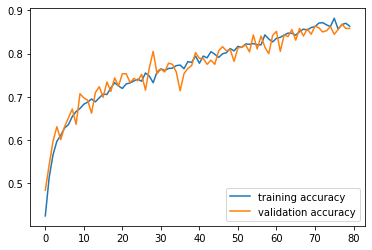

In [ ]:
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend(loc='lower right')

el l techniques el mmkn t heal el overfitting ?
add noise ll data - data augmntation - parameters optimizers - drop out 

In [ ]:
test=tf.keras.utils.load_img(list(data_file.glob("*/*"))[800],target_size=(180,180))
img1 = tf.keras.utils.img_to_array(test)
outputimg=tf.expand_dims(img1 ,0)
output=model.predict( outputimg)
np.argmax(output)

1

In [ ]:
list(data_file.glob("*/*"))[800]

PosixPath('/root/.keras/datasets/flower_photos/dandelion/8681420404_6ae114f036_n.jpg')

In [ ]:
test=tf.keras.utils.load_img(list(data_file.glob("*/*"))[1500],target_size=(180,180))
img1 = tf.keras.utils.img_to_array(test)
outputimg=tf.expand_dims(img1 ,0)
output=model.predict( outputimg)
np.argmax(output)

1

In [ ]:
list(data_file.glob("*/*"))[1500]

PosixPath('/root/.keras/datasets/flower_photos/dandelion/4226758402_a1b75ce3ac_n.jpg')

In [ ]:
test=tf.keras.utils.load_img(list(data_file.glob("*/*"))[1792],target_size=(180,180))
img1 = tf.keras.utils.img_to_array(test)
outputimg=tf.expand_dims(img1 ,0)
output=model.predict( outputimg)
np.argmax(output)

4

In [ ]:

list(data_file.glob("*/*"))[1792]

PosixPath('/root/.keras/datasets/flower_photos/tulips/3421027755_cdb8fef8e8_n.jpg')

In [ ]:
test=tf.keras.utils.load_img(list(data_file.glob("*/*"))[3000],target_size=(180,180))
img1 = tf.keras.utils.img_to_array(test)
outputimg=tf.expand_dims(img1 ,0)
output=model.predict( outputimg)
np.argmax(output)

3

In [ ]:
list(data_file.glob("*/*"))[3000]

PosixPath('/root/.keras/datasets/flower_photos/sunflowers/5139971615_434ff8ed8b_n.jpg')

In [ ]:
test=tf.keras.utils.load_img(list(data_file.glob("*/*"))[112],target_size=(180,180))
img1 = tf.keras.utils.img_to_array(test)
outputimg=tf.expand_dims(img1 ,0)
output=model.predict( outputimg)
np.argmax(output)

0

In [ ]:
list(data_file.glob("*/*"))[112]

PosixPath('/root/.keras/datasets/flower_photos/daisy/21626652132_97e1318bb8_m.jpg')

In [ ]:
test=tf.keras.utils.load_img(list(data_file.glob("*/*"))[2],target_size=(180,180))
img1 = tf.keras.utils.img_to_array(test)
outputimg=tf.expand_dims(img1 ,0)
output=model.predict( outputimg)
np.argmax(output)

0

In [ ]:
list(data_file.glob("*/*"))[2]

PosixPath('/root/.keras/datasets/flower_photos/daisy/19280272025_57de24e940_m.jpg')

In [ ]:
test=tf.keras.utils.load_img('/content/Top-25-Most-Beautiful-Daisy-Flowers.jpg',target_size=(180,180))
img1 = tf.keras.utils.img_to_array(test)
outputimg=tf.expand_dims(img1 ,0)
output=model.predict( outputimg)
np.argmax(output)

0

In [ ]:
test=tf.keras.utils.load_img('/content/roses.jpg',target_size=(180,180))
img1 = tf.keras.utils.img_to_array(test)
outputimg=tf.expand_dims(img1 ,0)
output=model.predict( outputimg)
np.argmax(output)

2

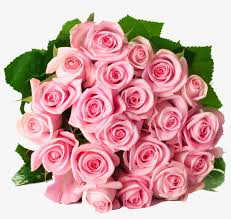

In [ ]:
PIL.Image.open('/content/roses.jpg')

In [ ]:
test=tf.keras.utils.load_img('/content/sunflower.jpg',target_size=(180,180))
img1 = tf.keras.utils.img_to_array(test)
outputimg=tf.expand_dims(img1 ,0)
output=model.predict( outputimg)
np.argmax(output)

3

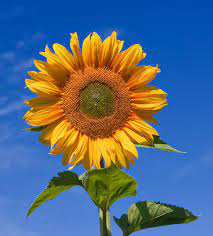

In [ ]:
PIL.Image.open('/content/sunflower.jpg')


In [ ]:
test=tf.keras.utils.load_img('/content/tulips.jpg',target_size=(180,180))
img1 = tf.keras.utils.img_to_array(test)
outputimg=tf.expand_dims(img1 ,0)
output=model.predict( outputimg)
np.argmax(output)

4

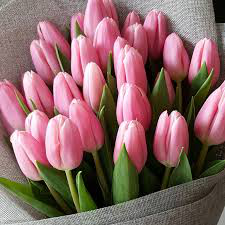

In [ ]:
PIL.Image.open('/content/tulips.jpg')